# Step 2: Hypothesis 1

Video’s met een expliciete CTA om een comment achter te laten, genereren significant meer comments dan video’s zonder die CTA.

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Get the data from the previous step
exp_videos = pd.read_excel('../output/exp_videos.xlsx')

## 2.1 Data Exploration

In [4]:
# Explore the data structure
exp_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11 non-null     object 
 1   title                11 non-null     object 
 2   publish_date         11 non-null     object 
 3   duration             11 non-null     object 
 4   views                11 non-null     int64  
 5   likes                11 non-null     int64  
 6   dislikes             11 non-null     int64  
 7   shares               11 non-null     int64  
 8   comments             11 non-null     int64  
 9   engagement           11 non-null     float64
 10  views_24h            11 non-null     int64  
 11  views_1w             11 non-null     int64  
 12  views_2w             11 non-null     int64  
 13  views_1m             11 non-null     int64  
 14  views_2m             10 non-null     float64
 15  views_3m             3 non-null      float

In [5]:
# Get a statistical summary of the total data
exp_videos[['views', 'likes', 'dislikes','shares', 'comments', 'engagement']].describe()

,views,likes,dislikes,shares,comments,engagement
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2849.181818,63.727273,1.181818,40.363636,5.272727,3.731818
std,1410.740147,29.631372,1.662419,31.187410,3.901049,0.553802
min,1138.000000,23.000000,0.000000,15.000000,1.000000,2.680000
25%,1984.500000,42.500000,0.000000,22.000000,2.500000,3.465000
50%,2124.000000,52.000000,0.000000,27.000000,4.000000,3.650000
75%,3633.500000,88.500000,2.000000,45.000000,7.500000,3.930000
max,5950.000000,108.000000,5.000000,101.000000,13.000000,4.930000


In [6]:
# Get a statistical summary of the data after 24h
exp_videos[['views_24h', 'likes_24h', 'dislikes_24h','shares_24h', 'comments_24h', 'engagement_rate_24h']].describe()

,views_24h,likes_24h,dislikes_24h,shares_24h,comments_24h,engagement_rate_24h
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1153.545455,34.181818,0.636364,15.363636,2.727273,4.350909
std,413.806081,17.600103,0.809040,9.892146,1.348400,0.864170
min,560.000000,11.000000,0.000000,7.000000,1.000000,2.530000
25%,841.000000,18.000000,0.000000,8.000000,2.000000,3.820000
50%,1086.000000,37.000000,0.000000,11.000000,2.000000,4.530000
75%,1520.000000,49.000000,1.000000,20.000000,3.000000,5.010000
max,1860.000000,61.000000,2.000000,36.000000,6.000000,5.300000


In [7]:
# Get a statistical summary of the data after 1 week
exp_videos[['views_1w', 'likes_1w', 'dislikes_1w','shares_1w', 'comments_1w', 'engagement_rate_1w']].describe()

,views_1w,likes_1w,dislikes_1w,shares_1w,comments_1w,engagement_rate_1w
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2101.636364,53.000000,1.090909,30.181818,3.818182,4.152727
std,1247.392663,27.158792,1.221028,24.640691,1.778661,0.860013
min,763.000000,16.000000,0.000000,8.000000,2.000000,2.610000
25%,1421.500000,35.000000,0.000000,13.500000,2.500000,3.535000
50%,1461.000000,47.000000,1.000000,22.000000,3.000000,4.180000
75%,2493.000000,71.000000,2.000000,35.000000,5.000000,4.605000
max,5299.000000,102.000000,3.000000,87.000000,7.000000,5.640000


In [8]:
# Get a statistical summary of the data after 2 weeks
exp_videos[['views_2w', 'likes_2w', 'dislikes_2w','shares_2w', 'comments_2w', 'engagement_rate_2w']].describe()

,views_2w,likes_2w,dislikes_2w,shares_2w,comments_2w,engagement_rate_2w
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2356.545455,56.727273,1.090909,33.909091,4.181818,4.027273
std,1352.430210,28.379890,1.221028,26.413839,1.721522,0.763022
min,855.000000,19.000000,0.000000,12.000000,2.000000,2.600000
25%,1579.500000,38.000000,0.000000,17.000000,3.000000,3.630000
50%,1652.000000,47.000000,1.000000,22.000000,4.000000,4.060000
75%,2898.000000,74.500000,2.000000,41.000000,5.500000,4.285000
max,5696.000000,106.000000,3.000000,93.000000,7.000000,5.380000


In [9]:
# Get a statistical summary of the data after 1 month
exp_videos[['views_1m', 'likes_1m', 'dislikes_1m','shares_1m', 'comments_1m', 'engagement_rate_1m']].describe()

,views_1m,likes_1m,dislikes_1m,shares_1m,comments_1m,engagement_rate_1m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2542.545455,59.909091,1.090909,36.181818,4.181818,3.931818
std,1390.616868,28.511242,1.221028,28.343670,1.721522,0.654764
min,967.000000,23.000000,0.000000,13.000000,2.000000,2.890000
25%,1724.500000,39.000000,0.000000,19.500000,3.000000,3.600000
50%,1805.000000,49.000000,1.000000,22.000000,4.000000,3.830000
75%,3215.000000,81.000000,2.000000,42.500000,5.500000,4.085000
max,5824.000000,108.000000,3.000000,95.000000,7.000000,5.170000


In [10]:
# Get a statistical summary of the data after 2 months
exp_videos[['views_2m', 'likes_2m', 'dislikes_2m','shares_2m', 'comments_2m', 'engagement_rate_2m']].describe()

,views_2m,likes_2m,dislikes_2m,shares_2m,comments_2m,engagement_rate_2m
count,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000
mean,2719.600000,61.100000,1.20000,41.000000,4.20000,3.826000
std,1483.998667,30.805663,1.47573,32.683669,1.75119,0.636661
min,1064.000000,23.000000,0.00000,15.000000,2.00000,2.870000
25%,1853.500000,38.250000,0.00000,20.500000,3.00000,3.572500
50%,1950.500000,49.000000,0.50000,24.000000,4.00000,3.715000
75%,3577.250000,88.000000,2.00000,47.500000,5.75000,3.930000
max,5908.000000,108.000000,4.00000,101.000000,7.00000,4.970000


In [11]:
# Get a statistical summary of the data after 3 months
exp_videos[['views_3m', 'likes_3m', 'dislikes_3m','shares_3m', 'comments_3m', 'engagement_rate_3m']].describe()

,views_3m,likes_3m,dislikes_3m,shares_3m,comments_3m,engagement_rate_3m
count,3.000000,3.000000,3.0,3.000000,3.0,3.000000
mean,2654.666667,56.000000,2.0,32.666667,3.0,3.280000
std,1175.750966,33.778692,2.0,15.534907,1.0,0.473181
min,1951.000000,36.000000,0.0,20.000000,2.0,2.750000
25%,1976.000000,36.500000,1.0,24.000000,2.5,3.090000
50%,2001.000000,37.000000,2.0,28.000000,3.0,3.430000
75%,3006.500000,66.000000,3.0,39.000000,3.5,3.545000
max,4012.000000,95.000000,4.0,50.000000,4.0,3.660000


## 2.2 Checking for trends and patterns

In [12]:
# Engagement metrics vs has_CTA
metrics = ['views', 'likes', 'dislikes', 'shares', 'comments', 'engagement']
cta_stats_mean = exp_videos.groupby('has_CTA')[metrics].mean()
cta_stats_median = exp_videos.groupby('has_CTA')[metrics].median()
cta_stats_std = exp_videos.groupby('has_CTA')[metrics].std()
cta_stats = pd.DataFrame({
    'mean': cta_stats_mean.stack().round(3),
    'median': cta_stats_median.stack().round(3),
    'std': cta_stats_std.stack().round(3)
})
cta_stats

mean   median       std
has_CTA                                        
False   views       3464.600  4138.00  1950.936
        likes         76.800   100.00    38.467
        dislikes       0.600     0.00     0.894
        shares        57.800    50.00    40.616
        comments       5.800     4.00     5.450
        engagement     4.020     3.89     0.562
True    views       2336.333  2075.50   491.018
        likes         52.833    48.50    16.092
        dislikes       1.667     1.00     2.066
        shares        25.833    25.50     8.256
        comments       4.833     4.50     2.483
        engagement     3.492     3.54     0.456

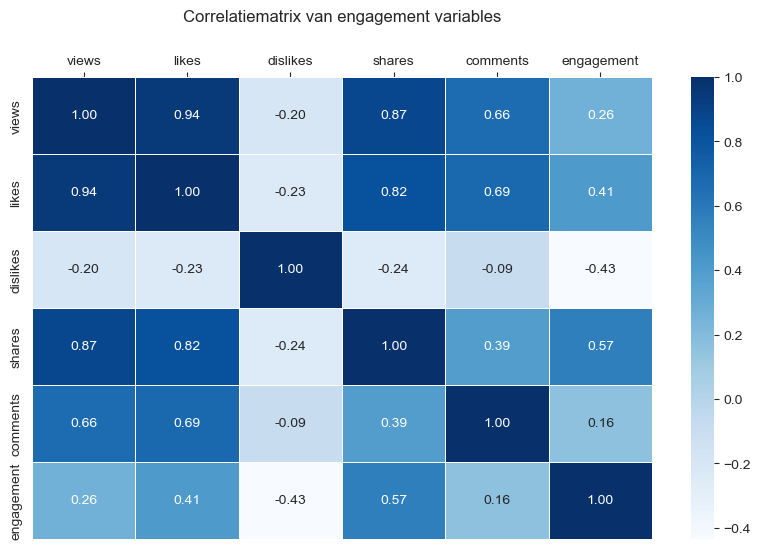

In [13]:
# Create correlation matrix for statistical analysis (total only)
correlation_matrix = exp_videos[['views', 'likes', 'dislikes', 'shares', 'comments', 'engagement']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.title('Correlatiematrix van engagement variables', pad=40)  # Moves title up

# Show the plot
plt.show()

1️⃣ Sterke positieve correlaties
- Views & Likes (0.94) → Meer views leiden vrijwel altijd tot meer likes.
- Views & Shares (0.87) → Video’s die veel bekeken worden, worden ook vaak gedeeld.
- Likes & Shares (0.82)→ Video’s met veel likes worden vaker gedeeld.

🔍 Wat betekent dit?<br>
✅ Views, likes en shares hangen sterk samen.<br>
✅ Dit betekent dat een video die veel bekeken wordt, vaak ook veel interacties (likes/shares) krijgt.<br>

2️⃣ Comments hebben een matige correlatie met andere engagement metrics
- Comments & Likes (0.69) → Video’s met veel likes krijgen vaak meer comments.
- Comments & Views (0.66) → Meer views leiden meestal tot meer comments, maar niet zo sterk als bij likes/shares.
- Comments & Shares (0.39) → Delen heeft een zwakker verband met comments.

🔍 Wat betekent dit?<br>
✅ Likes en views zijn belangrijker dan shares als het gaat om het voorspellen van het aantal comments.<br>
✅ Maar de correlatie is niet extreem hoog, wat betekent dat comments niet puur afhangen van views of likes.<br>

3️⃣ Dislikes hebben nauwelijks invloed (-0.09 tot -0.24)
- Dislikes & Views (-0.20) → Heel zwakke negatieve correlatie.
- Dislikes & Likes (-0.23) → Licht negatieve correlatie, maar niets bijzonders.
- Dislikes & Comments (-0.09) → Bijna geen verband.

🔍 Wat betekent dit?<br>
✅ Dislikes lijken geen sterke rol te spelen in engagement.<br>
✅ Dit kan betekenen dat dislikes niet vaak gebruikt worden, of dat ze weinig invloed hebben op andere metrics.<br>

4️⃣ Engagement-score hangt vooral samen met Shares (0.57) en Likes (0.41)
- Engagement & Shares (0.57) → Veel gedeelde video’s scoren hoog in engagement.
- Engagement & Likes (0.41) → Likes dragen ook bij aan een hoge engagement-rate.

🔍 Wat betekent dit?<br>
✅ Dit laat zien dat delen en liken belangrijker zijn voor “engagement” dan comments.

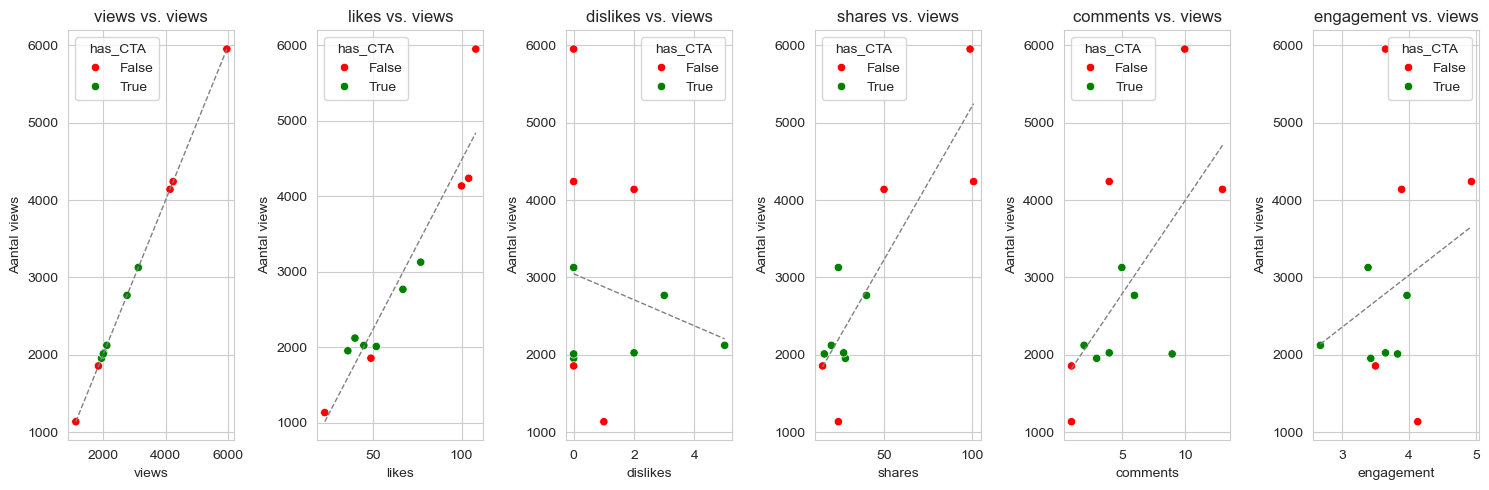

In [23]:
# View patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['views'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['views'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. views')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal views')
plt.tight_layout()
plt.show()

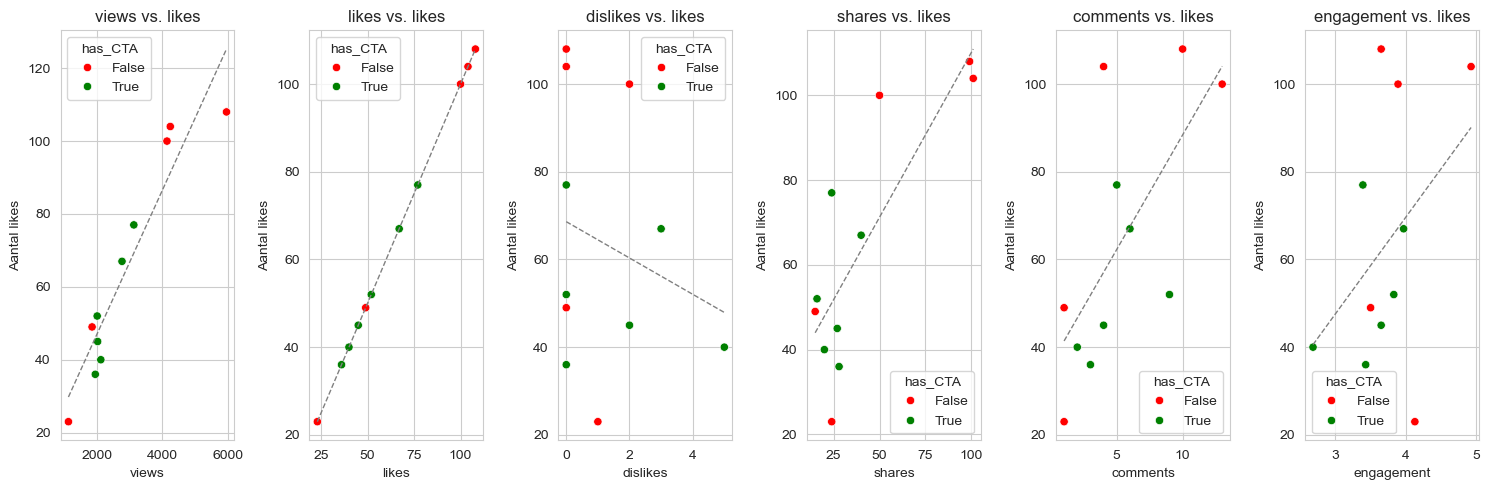

In [24]:
# Like patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['likes'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['likes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. likes')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal likes')
plt.tight_layout()
plt.show()

In [ ]:
# Dislike patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['dislikes'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['dislikes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. dislikes')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal dislikes')
plt.tight_layout()
plt.show()

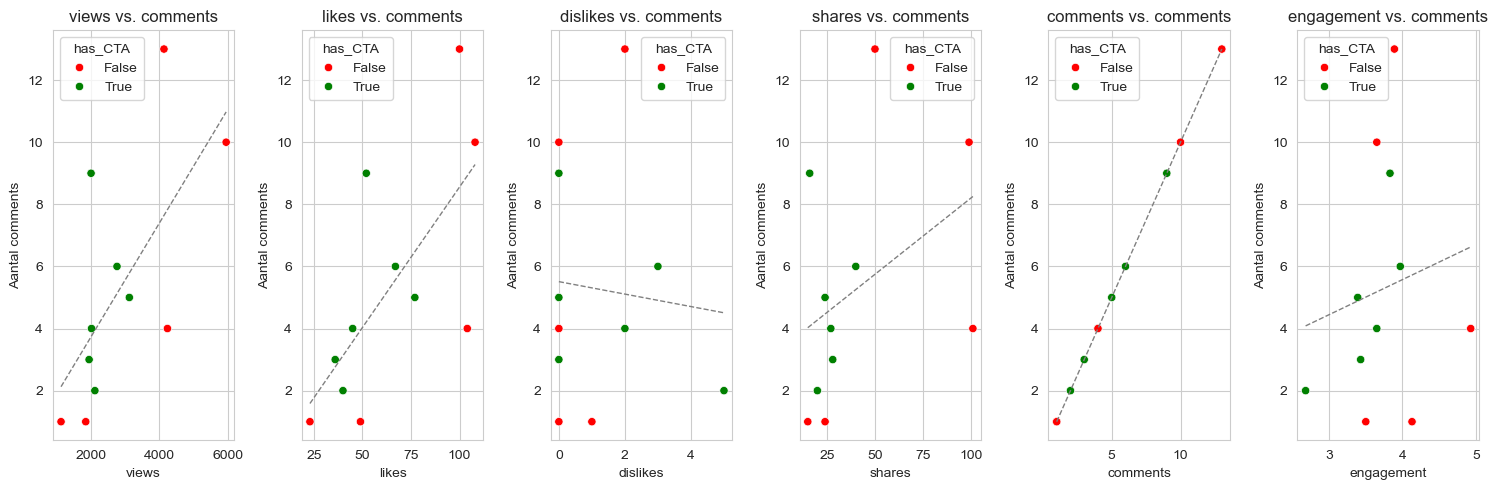

In [25]:
# Comment patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['comments'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['comments'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. comments')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal comments')
plt.tight_layout()
plt.show()

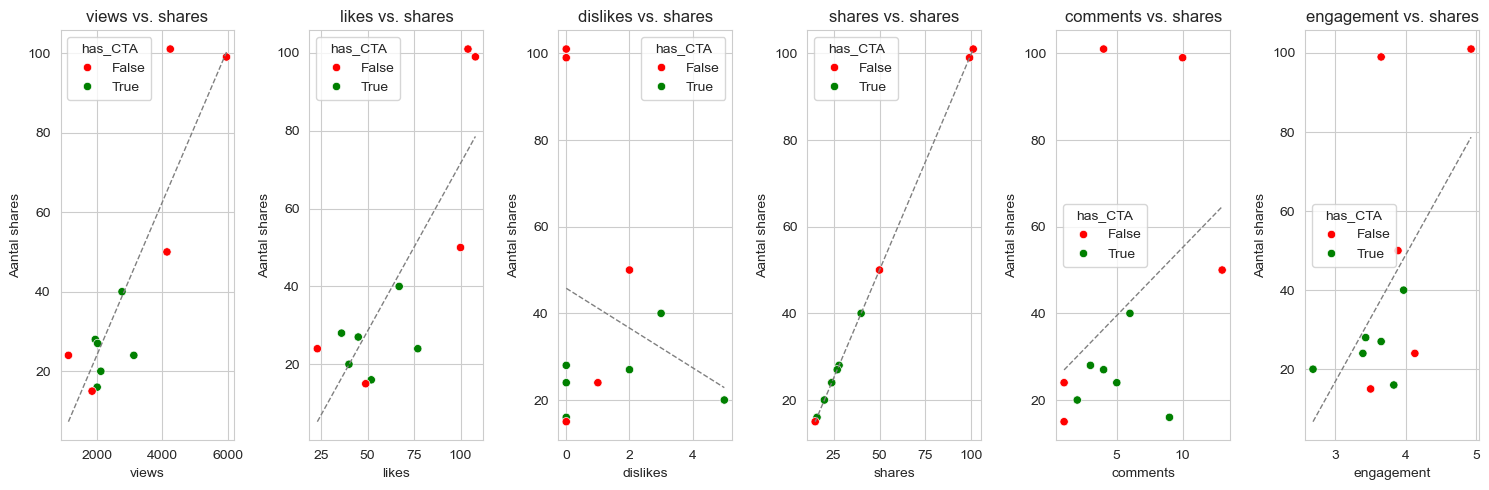

In [26]:
# Share patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['shares'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['shares'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. shares')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal shares')
plt.tight_layout()
plt.show()

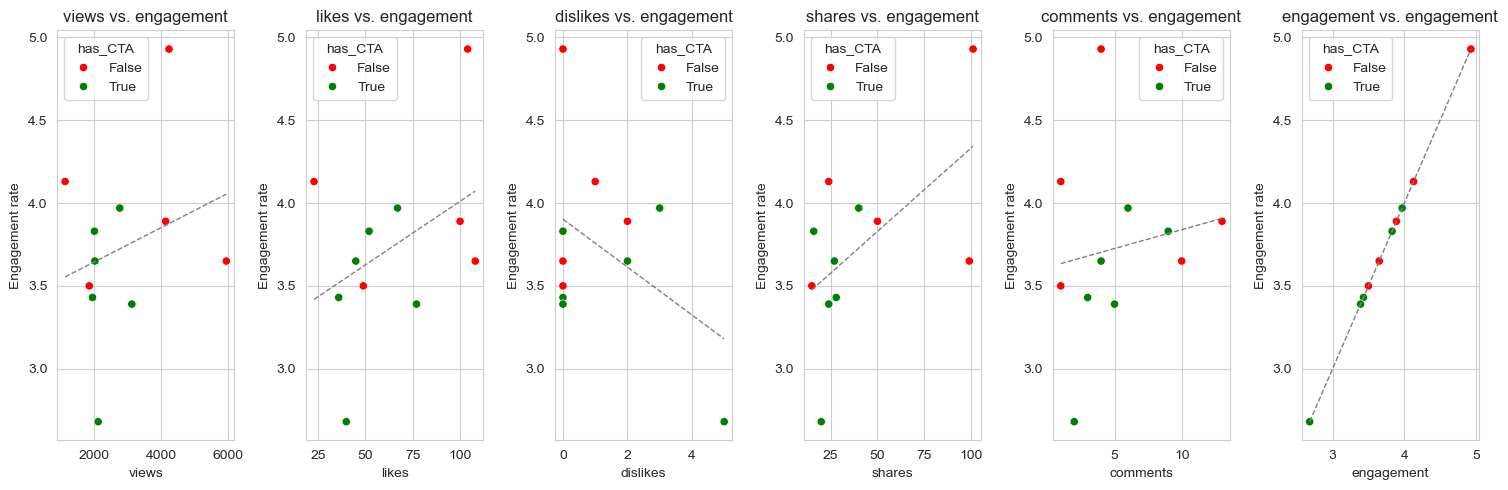

In [27]:
# Engagement patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 5))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['engagement'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['engagement'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. engagement')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Engagement rate')
plt.tight_layout()
plt.show()

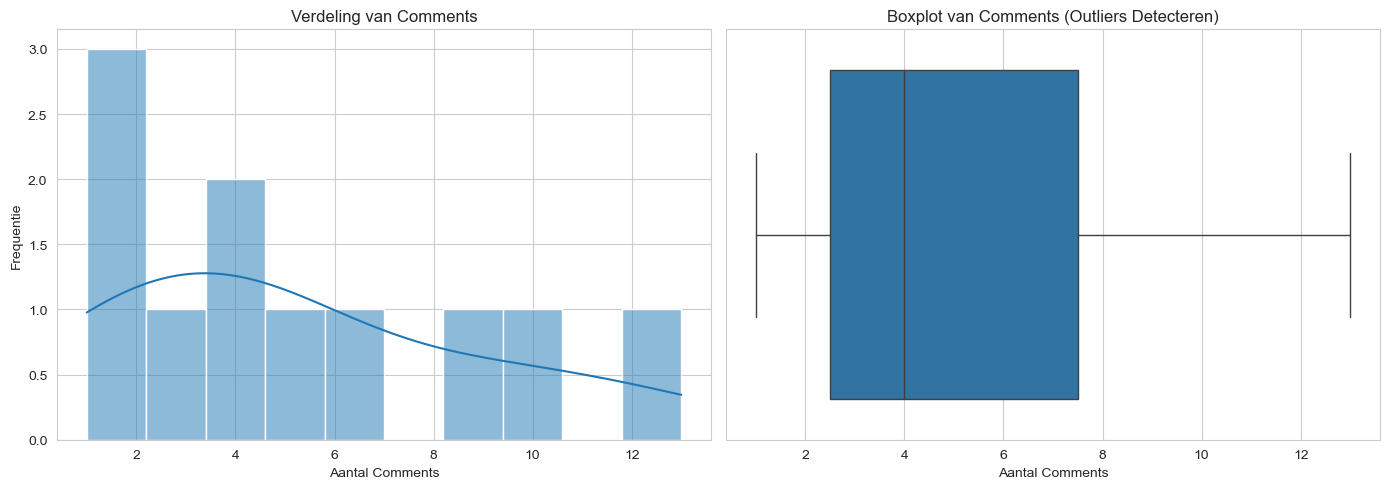

In [14]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of comments
sns.histplot(exp_videos['comments'], bins=10, kde=True, ax=axes[0])
axes[0].set_xlabel('Aantal Comments')
axes[0].set_ylabel('Frequentie')
axes[0].set_title('Verdeling van Comments')

# Boxplot to check for outliers
sns.boxplot(x=exp_videos['comments'], ax=axes[1])
axes[1].set_xlabel('Aantal Comments')
axes[1].set_title('Boxplot van Comments (Outliers Detecteren)')

# Show the plots
plt.tight_layout()
plt.show()

1️⃣ Histogram (Links) → Verdeling van Comments
- De meeste video’s hebben weinig comments (tussen 1 en 5).
- Er is een daling in frequentie bij hogere aantallen comments.
- De verdeling lijkt scheef (rechtsscheef) → Er zijn enkele video’s met veel meer comments dan de rest.
- De KDE-lijn (de blauwe curve) suggereert geen normale verdeling.


🔎 Wat betekent dit?<br>
✅ De meeste video’s krijgen weinig comments.<br>
✅ Er zijn enkele video’s met relatief veel comments, wat kan duiden op een lange staart in de verdeling.<br>
✅ Dit bevestigt dat een gemiddelde (mean) minder representatief is dan de mediaan.
<br><br>
2️⃣ Boxplot (Rechts) → Spreiding & Outliers
- De box laat zien dat de mediaan rond 4 ligt.
- De onderste en bovenste “whiskers” geven de spreiding weer.
- Er lijken geen extreme outliers te zijn (geen losse punten buiten de whiskers).


🔎 Wat betekent dit?<br>
✅ De meeste video’s zitten tussen 2 en 8 comments.<br>
✅ Geen extreme uitschieters, dus er zijn geen video’s die de resultaten volledig scheeftrekken.


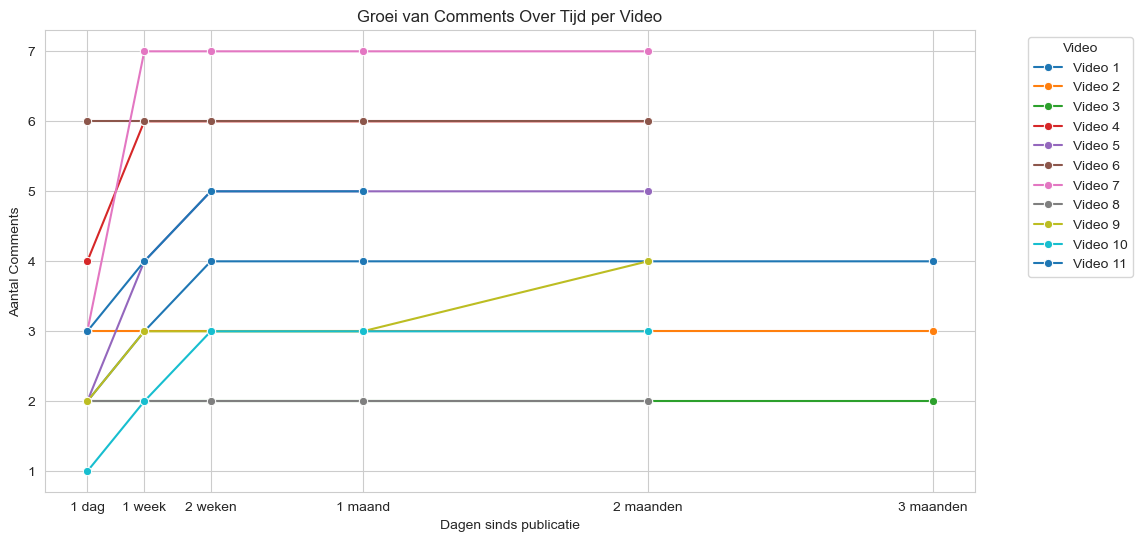

In [15]:
# Comments over time (per video)

# Make sure video_id is regarded as a string
exp_videos['id'] = exp_videos['id'].astype(str)

# Create a mapping from original Video IDs to sequential numbers
video_mapping = {video_id: f"Video {i+1}" for i, video_id in enumerate(exp_videos['id'].unique())}

# Apply the mapping to a new column
exp_videos['video_number'] = exp_videos['id'].map(video_mapping)

# Select relevant time-based columns for comments
time_columns = ['comments_24h', 'comments_1w', 'comments_2w', 'comments_1m', 'comments_2m', 'comments_3m']

# Convert from wide to long format for better plotting
comments_long = exp_videos.melt(id_vars=['video_number', 'title'], value_vars=time_columns,
                                var_name='time_period', value_name='comments_over_time')

# Map time periods to numerical values (e.g., 'comments_24h' → 1, 'comments_1w' → 7, etc.)
time_mapping = {'comments_24h': 1, 'comments_1w': 7, 'comments_2w': 14,
                'comments_1m': 30, 'comments_2m': 60, 'comments_3m': 90}
comments_long['time_days'] = comments_long['time_period'].map(time_mapping)

# Plot comment growth per video over time with legend
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=comments_long, x='time_days', y='comments_over_time',
                  hue='video_number', marker='o', palette='tab10')

plt.xlabel('Dagen sinds publicatie')
plt.ylabel('Aantal Comments')
plt.title('Groei van Comments Over Tijd per Video')
plt.xticks([1, 7, 14, 30, 60, 90], labels=['1 dag', '1 week', '2 weken', '1 maand', '2 maanden', '3 maanden'])

# Ensure legend appears correctly
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Video', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

1️⃣ Algemene Observaties
-De meeste video’s krijgen hun comments vroeg (binnen de eerste week).
- Na 1 of 2 weken vlakt de groei af en blijven de commentaantallen stabiel.
- Er zijn geen video’s die na de eerste maand nog veel extra comments krijgen.
- Sommige video’s starten laag en groeien snel, terwijl andere nauwelijks groeien.

2️⃣ Wat betekent dit?

1.	Comments komen vroeg in de levenscyclus van een video
    - Als een video comments krijgt, gebeurt dat meestal in de eerste week.
    - CTA’s later in de video lifecycle hebben waarschijnlijk weinig impact.
    - Dit suggereert dat early engagement cruciaal is (mogelijk beïnvloed door views/likes in de eerste dagen).
2. Bepaalde video’s krijgen meer groei dan andere
    - Video’s met een steile lijn in het begin (bijv. roze en rood) trekken snel comments.
    - Andere video’s (grijs, groen) blijven op een laag niveau steken.
    - Mogelijk is er inhoudelijk verschil tussen de video’s die snel comments krijgen en de video’s die dat niet doen.
3. De CTA heeft hoogstwaarschijnlijk geen blijvend effect
     - Als CTA’s echt zouden werken, zou je verwachten dat video’s met CTA consistent meer groei in comments hebben.
     - De grafiek laat echter zien dat de meeste video’s stoppen met het krijgen van comments na 1-2 weken, ongeacht of ze een CTA hebben.

In [16]:
# Mean and standard deviation of comments per group (with and without CTA)
cta_stats = exp_videos.groupby('has_CTA')['comments'].describe()
cta_stats

,count,mean,std,min,25%,50%,75%,max
has_CTA,,,,,,,,
False,5.0,5.800000,5.449771,1.0,1.00,4.0,10.00,13.0
True,6.0,4.833333,2.483277,2.0,3.25,4.5,5.75,9.0


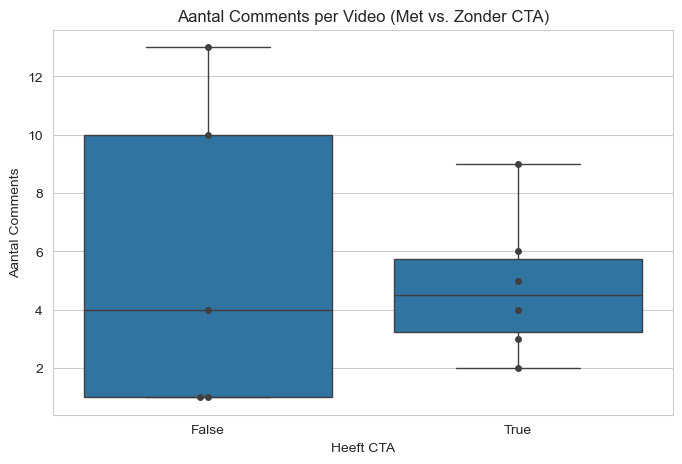

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=exp_videos['has_CTA'], y=exp_videos['comments'])
sns.swarmplot(x=exp_videos['has_CTA'], y=exp_videos['comments'], color=".25")
plt.xlabel('Heeft CTA')
plt.ylabel('Aantal Comments')
plt.title('Aantal Comments per Video (Met vs. Zonder CTA)')
plt.show()

1️⃣ Algemene Observaties
- Mediaan (middenlijn in de box):
    - Video’s met een CTA hebben een mediaan rond 4-5 comments.
    - Video’s zonder CTA hebben een mediaan rond 3-4 comments.
    - Kleine verschillen, geen dramatische toename bij CTA.
- Spreiding (Interquartile Range, IQR):
    - Video’s zonder CTA hebben veel grotere spreiding (tussen 1 en 13 comments).
    - Video’s met CTA hebben een compactere spreiding (tussen 2 en 8 comments).
    - Dit betekent dat bij video’s zonder CTA sommige uitzonderlijk veel comments krijgen, terwijl bij video’s met CTA de comments meer consistent blijven.
- Outliers:
    - Video’s zonder CTA hebben een extreme outlier (~13 comments).
    - Video’s met CTA hebben geen extreme uitschieters.

2️⃣ Wat betekent dit?
- CTA heeft geen duidelijk voordeel in het aantal comments
    - De mediaan is vrijwel gelijk voor beide groepen.
    - Dit bevestigt de T-test (p = 0.7282) en Mann-Whitney U-test (p = 1.0000): CTA’s hebben geen significant effect.
- Meer variabiliteit zonder CTA
    - Video’s zonder CTA hebben een bredere spreiding, wat betekent dat sommige zonder CTA uitzonderlijk goed presteren in comments, terwijl andere weinig krijgen.
    - Video’s met CTA zijn meer voorspelbaar, maar niet noodzakelijk beter.
- Geen bewijs voor consistent meer comments bij CTA-video’s
    - Als CTA’s effectief waren, zouden we duidelijk hogere medianen en hogere outliers verwachten bij CTA-video’s.
    - Dat is niet het geval → CTA’s lijken dus geen doorslaggevende factor te zijn.


🚀 Conclusie<br>
✅ CTA-video’s genereren niet significant meer comments dan video’s zonder CTA.<br>
✅ De verdeling van comments is bij CTA-video’s consistenter, maar niet hoger.<br>
✅ Video’s zonder CTA tonen een grotere variabiliteit, met sommige video’s die veel beter presteren qua comments.<br>

💡 Mogelijke verklaring:
- Andere factoren (zoals video-onderwerp, kijkersbetrokkenheid, of virale effecten) kunnen belangrijker zijn dan een CTA.
- Een CTA garandeert niet meer comments, maar zorgt mogelijk voor meer gelijkmatige engagement.

In [18]:
# Test normality for both groups
shapiro_cta = stats.shapiro(exp_videos[exp_videos['has_CTA'] == True]['comments'])
shapiro_no_cta = stats.shapiro(exp_videos[exp_videos['has_CTA'] == False]['comments'])

print(f'Shapiro-Wilk test (CTA): p-waarde = {shapiro_cta.pvalue:.4f}')
print(f'Shapiro-Wilk test (Geen CTA): p-waarde = {shapiro_no_cta.pvalue:.4f}')

Shapiro-Wilk test (CTA): p-waarde = 0.7939
Shapiro-Wilk test (Geen CTA): p-waarde = 0.2538


Zowel de CTA-groep als de niet CTA-groep zijn normaal verdeeld --> We kunnen een onafhankelijke t-test gebruiken om te testen of er een significant verschil is tussen beide groepen. Moest de data niet normaal verdeeld zijn, zouden we een Mann-Whitney U-test gebruiken.

Motivatie:
- De data is normaal verdeeld (Shapiro-Wilk p-waarde > 0.05)
- De steekproef is klein MAAR niet TE klein, hoewel deze wel minder betrouwbaar is bij n<30
- De varianties van de 2 groepen zijn ongeveer gelijk (Er is homogeniteit)

In [19]:
# Split into 2 groups
comments_cta = exp_videos[exp_videos['has_CTA'] == True]['comments']
comments_no_cta = exp_videos[exp_videos['has_CTA'] == False]['comments']

# Onafhankelijke t-test uitvoeren
t_stat, p_value_ttest = stats.ttest_ind(comments_cta, comments_no_cta, equal_var=False)

print(f'T-test p-waarde: {p_value_ttest:.4f}')

T-test p-waarde: 0.7282


0.7282 > 0.05 --> We kunnen de nulhypothese niet verwerpen. Er is geen significant verschil in comments tussen video's met en zonder CTA.

We kunnen ook de effectgrootte berekenen om de praktische relevantie van eventuele verschillen te kwantificeren.

In [20]:
# Calculate Cohen's d
mean_diff = comments_cta.mean() - comments_no_cta.mean()
pooled_std = np.sqrt((comments_cta.std()**2 + comments_no_cta.std()**2) / 2)
cohens_d = mean_diff / pooled_std

print(f"Cohen's d: {cohens_d:.4f}")

Cohen's d: -0.2283


Een groep met CTA krijgt gemiddeld gezien minder comments dan een video zonder CTA. Cohen's d is echter zo klein dat het effect verwaarloosbaar is en praktisch niet relevant is.

Eventueel kan het interessant zijn om te controleren of er andere factoren dan wel/geen CTA een invloed hebben op het aantal comments.

Indien niet zeker van de T-tst, kan ook Mann-Whitney U-test uitgevoerd worden. Deze werkt beter bij kleine steekproeven en niet-normale verdelingen.

In [21]:
# Mann-Whitney U-test
# Split data into CTA vs. No CTA
comments_cta = exp_videos[exp_videos['has_CTA'] == True]['comments']
comments_no_cta = exp_videos[exp_videos['has_CTA'] == False]['comments']

# Mann-Whitney U-test
u_stat, p_value_mw = stats.mannwhitneyu(comments_cta, comments_no_cta, alternative='two-sided')

print(f'Mann-Whitney U-test U-waarde: {u_stat:.4f}')
print(f'Mann-Whitney U-test p-waarde: {p_value_mw:.4f}')

Mann-Whitney U-test U-waarde: 15.5000
Mann-Whitney U-test p-waarde: 1.0000


Omdat p = 1.0000 (veel groter dan 0.05), betekent dit dat er absoluut GEEN significant verschil is tussen het aantal comments bij video’s met en zonder CTA.

We kunnen ook de effectgrootte berekenen om de praktische relevantie van eventuele verschillen te kwantificeren.

In [22]:
# Calculate Cliff’s Delta

# Method
def cliffs_delta(x, y):
    x = np.array(x)
    y = np.array(y)
    delta = (np.sum(x[:, None] > y) - np.sum(x[:, None] < y)) / (len(x) * len(y))

    # Determine the effect size category
    if abs(delta) < 0.147:
        res = "negligible"
    elif abs(delta) < 0.33:
        res = "small"
    elif abs(delta) < 0.474:
        res = "medium"
    else:
        res = "large"

    return delta, res

# Split data into CTA vs. No CTA
comments_cta = exp_videos[exp_videos['has_CTA'] == True]['comments']
comments_no_cta = exp_videos[exp_videos['has_CTA'] == False]['comments']

# Get results
delta, res = cliffs_delta(comments_cta, comments_no_cta)
print(f"Cliff’s Delta: {delta:.4f} ({res})")

Cliff’s Delta: 0.0333 (negligible)


Ook hier wordt aangetoond dat het effect verwaarloosbaar is. De aanwezigheid van een expliciete CTA heeft quasi geen invloed op het aantal comments.

## 2.4 Resultaten

**Hyphothese 1**<br>
Video’s met een expliciete CTA om een comment achter te laten, genereren significant meer comments dan video’s zonder die CTA.

**Resultaten**
- T-test p-waarde: 0.7282 --> Geen significant verschil in comments tussen video's met en zonder CTA.
- Cohen's d: 0.0003 --> Verwaarloosbaar effect.
- Mann-Whitney U-test p-waarde: 1.0000 --> Geen significant verschil in comments tussen video's met en zonder CTA.
- Cliff’s Delta: 0.0000 (negligible) --> Verwaarloosbaar effect.

**Conclusie**<br>
Er is geen bewijs dat video’s met een CTA een impact heeft op het aantal comments.
